In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import keras

In [ ]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
#from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split

# input image dimensions
img_rows, img_cols = 200, 200

# number of channels
img_channels = 1

In [ ]:
path1 = '/content/drive/My Drive/input data'    #path of folder of images    
path2 = '/content/drive/My Drive/processedimages'  #path of folder to save images    

listing = os.listdir(path1)
num_samples=size(listing)
print ("",num_samples)

 261


In [ ]:
for file in listing:
    im = Image.open(path1 + '/' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'/' +  file, "JPEG")

imlist = os.listdir(path2)

In [ ]:
im1 = array(Image.open(path2 + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
print(m,n)
imnbr = print(len(imlist)) # get the number of images


200 200
261


In [ ]:
# create matrix to store all flattened images
immatrix = array([array(Image.open(path2 + '/' + im2)).flatten()
              for im2 in imlist],'f')

In [ ]:
label=np.ones((num_samples,),dtype = int)

In [ ]:
label[0:22]=1
label[22:43]=2
label[43:70]=3
label[91:103]=4
label[70:91]=5
label[103:124]=6
label[124:136]=7
label[136:157]=8
label[157:169]=9
label[169:181]=10
label[181:202]=11
label[202:223]=12
label[223:235]=13
label[181:]=14


In [ ]:
!pip install -q sklearn

In [ ]:
print(sklearn.__version__)

In [ ]:
# SKLEARN
import sklearn
from sklearn.utils import shuffle
from packaging.version import parse

if parse(sklearn.__version__) > parse('0.18'):
    from sklearn.model_selection import train_test_split
else:
    from sklearn.cross_validation import train_test_split

In [ ]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]


(261, 40000)
(261,)


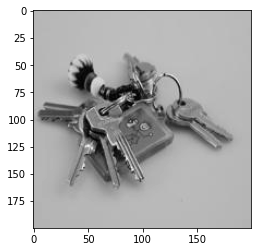

In [ ]:
img=immatrix[167].reshape(img_rows,img_cols)

plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [ ]:
#%%

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 14
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [ ]:
#%%
(X, y) = (train_data[0],train_data[1])


In [ ]:
# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (208, 1, 200, 200)
208 train samples
53 test samples


In [ ]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 15,dtype='float32')
Y_test = np_utils.to_categorical(y_test, 15,dtype='float32')


label :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


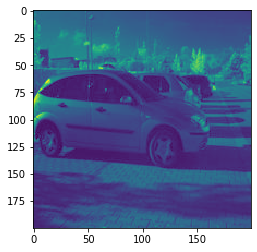

In [ ]:
i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [ ]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
print("tf.version is", tf.version)
#print("tf.keras.version is:", tf.keras.version)

def _get_available_gpus():
#Get a list of available gpu devices (formatted as strings)

    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]
tfback._get_available_gpus = _get_available_gpus

In [ ]:
#cnn model
model=Sequential()
model.add(Convolution2D(nb_filters, (3,3),
                        activation='relu',
                        input_shape=(1, img_rows, img_cols),data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(nb_filters,(3,3),
                        activation='relu',
                        input_shape=(1, img_rows, img_cols),data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(15,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=256)

Epoch 1/30
1/1 [==============================] - 0s 424ms/step - loss: 2.7148 - accuracy: 0.0577 - val_loss: 68.3164 - val_accuracy: 0.3208
Epoch 2/30
1/1 [==============================] - 0s 213ms/step - loss: 68.5173 - accuracy: 0.3029 - val_loss: 29.3811 - val_accuracy: 0.0755
Epoch 3/30
1/1 [==============================] - 0s 213ms/step - loss: 25.1101 - accuracy: 0.0817 - val_loss: 27.1745 - val_accuracy: 0.1698
Epoch 4/30
1/1 [==============================] - 0s 213ms/step - loss: 23.5136 - accuracy: 0.1490 - val_loss: 24.3489 - val_accuracy: 0.0943
Epoch 5/30
1/1 [==============================] - 0s 210ms/step - loss: 21.4795 - accuracy: 0.0769 - val_loss: 21.6325 - val_accuracy: 0.0566
Epoch 6/30
1/1 [==============================] - 0s 209ms/step - loss: 19.4908 - accuracy: 0.1058 - val_loss: 16.8289 - val_accuracy: 0.0566
Epoch 7/30
1/1 [==============================] - 0s 208ms/step - loss: 15.7216 - accuracy: 0.0433 - val_loss: 10.8917 - val_accuracy: 0.0943
Epoch 8

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 198, 198)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 99, 198)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 97, 196)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 48, 196)       0         
_________________________________________________________________
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              154141696 
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [ ]:
import scipy.misc

In [ ]:
img_names=['download.jpg','car.jpg']

In [ ]:
import numpy as np


In [ ]:
!pip install -q Pillow

In [ ]:
imgs = Image.open('/content/drive/My Drive/car.jpg')  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
    imgs = im.resize((img_rows,img_cols))

label :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


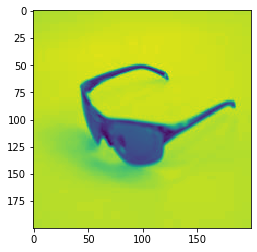

In [ ]:
i = 11
plt.imshow(X_test[i, 0], interpolation='nearest')
Xnew=print("label : ", Y_test[i,:])

label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


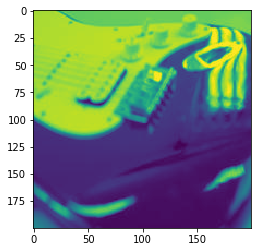

In [ ]:
i = 13
plt.imshow(X_test[i, 0], interpolation='nearest')
Xnew=print("label : ", Y_test[i,:])

label :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


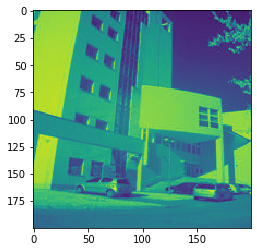

In [ ]:
i =48
plt.imshow(X_test[i, 0], interpolation='nearest')
Xnew=print("label : ", Y_test[i,:])